<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek42.do.txt  -->
<!-- dom:TITLE: Exercises week 42 -->

# Exercises week 42
**October 9-13, 2023**

Date: **Deadline is Sunday October 22 at midnight**

You can hand in the exercises from week 41 and week 42 as one exercise and get a total score of two additional points.

# Overarching aims of the exercises this week

The aim of the exercises this week is to get started with implementing
gradient methods of relevance for project 2. The exercise this week is a simple
continuation from the  previous week with the addition of automatic differentation.
Everything you develop here will be used in project 2. 

In order to get started, we will now replace in our standard ordinary
least squares (OLS) and Ridge regression codes (from project 1) the
matrix inversion algorithm with our own gradient descent (GD) and SGD
codes.  You can use the Franke function or the terrain data from
project 1. **However, we recommend using a simpler function like**
$f(x)=a_0+a_1x+a_2x^2$ or higher-order one-dimensional polynomials.
You can obviously test your final codes against for example the Franke
function. Automatic differentiation will be discussed next week.

You should include in your analysis of the GD and SGD codes the following elements
1. A plain gradient descent with a fixed learning rate (you will need to tune it) using automatic differentiation. Compare this with the analytical expression of the gradients you obtained last week. Feel free to use **Autograd** as Python package or **JAX**. You can use the examples form last week.

2. Add momentum to the plain GD code and compare convergence with a fixed learning rate (you may need to tune the learning rate). Compare this with the analytical expression of the gradients you obtained last week.

3. Repeat these steps for stochastic gradient descent with mini batches and a given number of epochs. Use a tunable learning rate as discussed in the lectures from week 39. Discuss the results as functions of the various parameters (size of batches, number of epochs etc)

4. Implement the Adagrad method in order to tune the learning rate. Do this with and without momentum for plain gradient descent and SGD using automatic differentiation..

5. Add RMSprop and Adam to your library of methods for tuning the learning rate. Again using automatic differentiation.

The lecture notes from weeks 39 and 40 contain more information and code examples. Feel free to use these examples.

We recommend reading chapter 8 on optimization from the textbook of [Goodfellow, Bengio and Courville](https://www.deeplearningbook.org/). This chapter contains many useful insights and discussions on the optimization part of machine learning.

theta from plain GD without momentum
[[4.12167318]
 [2.53039511]
 [2.41958206]]


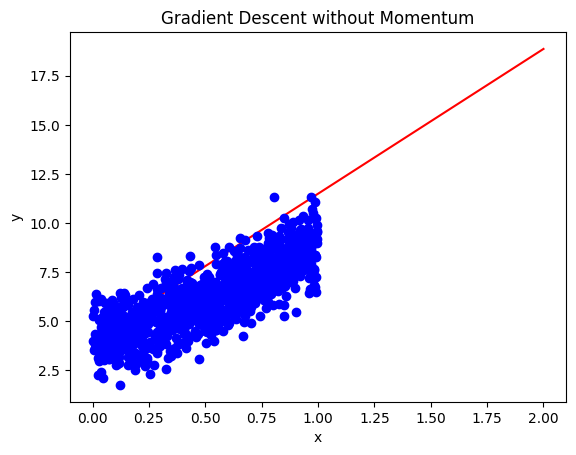

In [12]:
#Autograd with plain GD without momentum
import numpy as np
import autograd.numpy as anp
from autograd import grad
import matplotlib.pyplot as plt


def CostOLS(y, X, theta):
    return anp.sum((y - X @ theta)**2)

n = 1000
x = anp.random.rand(n, 1)
y = 4 + 3*x + 2*x**2 + anp.random.randn(n,1) 

X = anp.c_[anp.ones((n,1)), x, x**2]

theta = anp.random.randn(3, 1)
eta = 0.03 #learning rate
Niterations = 1000

training_gradient = grad(CostOLS, 2)

for _ in range(Niterations):
    gradients = (1.0 / n) * training_gradient(y, X, theta)
    theta -= eta * gradients

print("theta from plain GD without momentum")
print(theta)

# New data for predictions
x_new = anp.array([[0], [2]])
X_new = anp.c_[anp.ones((2,1)), x_new, x_new**2]

# Predictions 
y_predict = X_new @ theta

# Plot the results
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y ,'bo')
plt.title('Gradient Descent without Momentum')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The data is more clustered when using autograd than when using plain GD last week. When using autograd, it is using automatic differentiation to calculate the gradients which can lead to more precise derivative calculations compared to the numerical differentiation done in plain gradient decent. 

Better results with the autograd than last weeks exercises. 

theta from GD with momentum
[[4.11676273]
 [2.64053615]
 [2.21481845]]


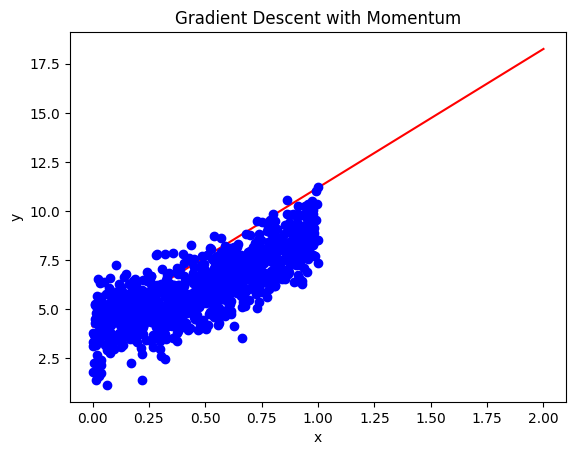

In [16]:
#Autograd plain GD with momentum
import autograd.numpy as anp
from autograd import grad

def CostOLS(y, X, theta):
    return anp.sum((y - X @ theta)**2)

n = 1000
x = anp.random.rand(n, 1)
y = 4 + 3*x + 2*x**2 + anp.random.randn(n,1) 

X = anp.c_[anp.ones((n,1)), x, x**2]

theta = anp.random.randn(3, 1)
eta = 0.3 #learning rate 
Niterations = 1000

momentum = 0.5  # momentum factor
velocity = anp.zeros_like(theta)  # initialize velocity to zeros

training_gradient = grad(CostOLS, 2)

for _ in range(Niterations):
    gradients = (1.0 / n) * training_gradient(y, X, theta)
    velocity = momentum * velocity + eta * gradients  # calculate velocity
    theta -= velocity  # update theta using velocity

print("theta from GD with momentum")
print(theta)

# New data for predictions
x_new = anp.array([[0], [2]])
X_new = anp.c_[anp.ones((2,1)), x_new, x_new**2]

# Predictions 
y_predict = X_new @ theta

# Plot the results
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y ,'bo')
plt.title('Gradient Descent with Momentum')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Better results than last week. The data is more clustered and much closer to the minima. 

Theta from SGD:  [[4.14705445]
 [2.79566399]
 [2.0728896 ]]


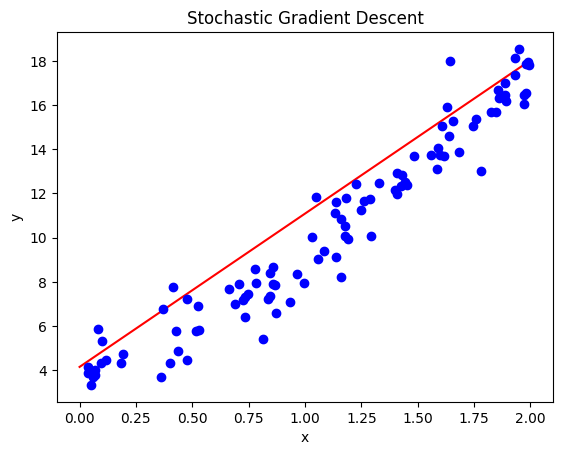

In [28]:
#Autograd and SGD 
#Without momentum
from random import random, seed
from autograd import grad
import autograd.numpy as np

# Cost function
def CostOLS(y, X, theta):
    return np.sum((y - X @ theta)**2)

# Function to compute learning rate
def learning_schedule(t, t0=5, t1=50):
    return t0/(t+t1)

n = 100
x = 2*np.random.rand(n, 1)
y = 4 + 3*x + 2*x**2 + anp.random.randn(n,1) 

X = anp.c_[anp.ones((n,1)), x, x**2]

theta = np.random.randn(3, 1)

Nepochs = 100  # Number of epochs
M = 20  # Size of each minibatch
m = int(n/M)  # Number of minibatches

# Derivative of Cost function (gradient)
training_gradient = grad(CostOLS, 2)

for epoch in range(Nepochs):
    for i in range(m):
        # Choose a random batch
        random_index = np.random.randint(m) * M
        xi = X[random_index:random_index + M]
        yi = y[random_index:random_index + M]
        
        # Compute gradients based on mini-batch
        gradients = training_gradient(yi, xi, theta) / M

        # Update learning rate
        eta = learning_schedule(epoch * m + i)
        
        # Update parameters (theta)
        theta = theta - eta * gradients

print("Theta from SGD: ", theta)

# New data for predictions
x_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2,1)), x_new, xnew**2]

# Predictions 
y_predict = X_new @ theta

# Plot the results
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y ,'bo')
plt.title('Stochastic Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Epochs: increasing the number of epochs means that the model has more opportunities to learn from the data, potentially improving its accuracy. However, there is a risk of overfitting if the number of epochs are too high, as the model might start fitting to the noise/outliers in the data. 
In our plot you can see that if you increase the number of epochs the curve fits closer to the data points. 

Mini-batches: the size determines how many examples the model uses to estimate the gradient on each step before updating the parameters (theta). A small mini-batch means that the model will make more frequent updates with larger variance in parameter updates. Big size, the model makes less frequent updates with smaller variance. 
In our plot, varying the mini-batch size might change the smoothness of the curve. 


Theta from SGD:  [[3.78329706]
 [3.49081238]
 [1.84914663]]


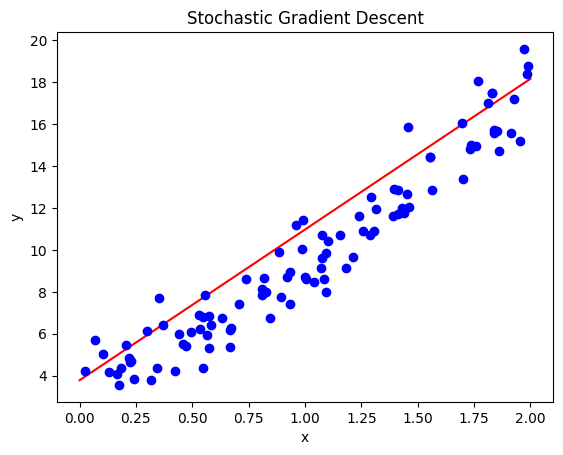

In [36]:
#Autograd and SGD 
#With momentum
from random import random, seed
from autograd import grad
import autograd.numpy as anp

# Cost function
def CostOLS(y, X, theta):
    return np.sum((y - X @ theta)**2)

# Function to compute learning rate
def learning_schedule(t, t0=5, t1=50):
    return t0/(t+t1)

n = 100
x = 2*anp.random.rand(n, 1)
y = 4 + 3*x + 2*x**2 + anp.random.randn(n,1) 

X = anp.c_[anp.ones((n,1)), x, x**2]

theta = anp.random.randn(3, 1)

Nepochs = 50  # Number of epochs
M = 5  # Size of each minibatch
m = int(n/M)  # Number of minibatches

# Derivative of Cost function (gradient)
training_gradient = grad(CostOLS, 2)

velocity = anp.zeros_like(theta)
momentum = 0.3

for epoch in range(Nepochs):
    for i in range(n // m):
        random_index = anp.random.randint(n // m) * m
        xi = X[random_index:random_index + m]
        yi = y[random_index:random_index + m]
        gradients = (2.0 / m) * training_gradient(yi, xi, theta)
        eta = learning_schedule(epoch * n // m + i)
        velocity = momentum * velocity - eta * gradients  # update velocity
        theta = theta + velocity  # update theta

print("Theta from SGD: ", theta)

# New data for predictions
x_new = anp.array([[0], [2]])
X_new = anp.c_[np.ones((2,1)), x_new, x_new**2]

# Predictions 
y_predict = X_new @ theta

# Plot the results
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y ,'bo')
plt.title('Stochastic Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:

#Autograd and SGD with adagrad
#without momentum
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# cost function
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 4 + 3*x + 2*x**2 + anp.random.randn(n,1) 

X = anp.c_[anp.ones((n,1)), x, x**2]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

#learning rate
eta = 0.01
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        Giter += gradients*gradients
        update = gradients*eta/(delta+np.sqrt(Giter))
        theta -= update
print("theta from own AdaGrad")
print(theta)

Own inversion
[[3.98548598]
 [3.14657977]
 [1.87923601]]
theta from own AdaGrad
[[4.14714453]
 [2.25809392]
 [2.7340402 ]]


In [46]:
#Autograd and SGD with adagrad
#without momentum
import autograd.numpy as anp
from autograd import grad
import matplotlib.pyplot as plt

# Cost function
def CostOLS(y, X, theta):
    return anp.sum((y - X @ theta)**2)

n = 1000
x = anp.random.rand(n, 1)
y = 4 + 3 * x + 2 * x**2 + anp.random.randn(n, 1)

X = anp.c_[anp.ones((n, 1)), x, x**2]

# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS, 2)

# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   # Size of each minibatch
m = int(n / M)  # Number of minibatches
theta = anp.random.randn(3, 1)

# Learning rate
eta = 0.01
# Including Adagrad parameter to avoid possible division by zero
delta = 1e-8
G = 0.0  # Initialize the accumulator for the squared gradients

# Momentum parameters
momentum = 0.9
velocity = anp.zeros_like(theta)

theta_values = [theta.copy()]  # Store the initial value

for epoch in range(n_epochs):
    for i in range(m):
        random_index = M * anp.random.randint(m)
        xi = X[random_index:random_index + M]
        yi = y[random_index:random_index + M]
        gradients = (1.0 / M) * training_gradient(yi, xi, theta)

        # Accumulate the squared gradients for Adagrad
        G += gradients**2

        # Update with momentum and Adagrad
        velocity = momentum * velocity + eta * gradients / (delta + anp.sqrt(G))
        theta -= velocity
        theta_values.append(theta.copy())  # Store the updated theta

print("Final theta from SGD with Adagrad and Momentum")
print(theta)

Final theta from SGD with Adagrad and Momentum
[[3.87875919]
 [2.37813558]
 [2.98919108]]


theta from Plain GD with Adagrad
[[0.68065011]
 [1.17689685]
 [3.39108005]]


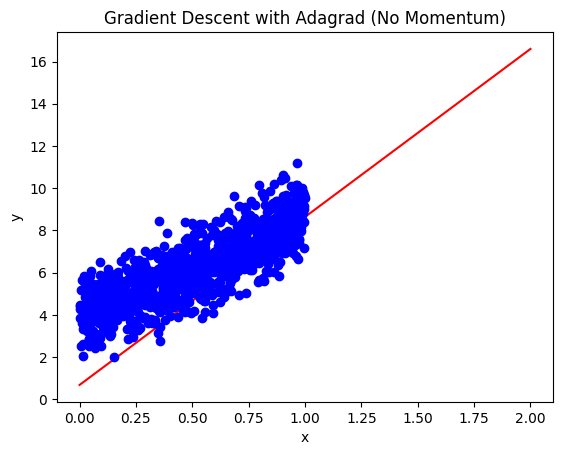

In [43]:
#Gradient Descent with Adagrad (No Momentum)
import numpy as np
import autograd.numpy as anp
from autograd import grad
import matplotlib.pyplot as plt

def CostOLS(y, X, theta):
    return anp.sum((y - X @ theta)**2)

n = 1000
x = anp.random.rand(n, 1)
y = 4 + 3 * x + 2 * x**2 + anp.random.randn(n, 1)

X = anp.c_[anp.ones((n, 1)), x, x**2]

theta = anp.random.randn(3, 1)
Niterations = 1000

training_gradient = grad(CostOLS, 2)

# Initialize Adagrad accumulator
delta = 1e-8
G = np.zeros(theta.shape)

for _ in range(Niterations):
    gradients = (1.0 / n) * training_gradient(y, X, theta)

    # Accumulate the squared gradients for Adagrad
    G += gradients**2

    # Update with Adagrad
    eta = 0.03 / (delta + anp.sqrt(G))
    theta -= eta * gradients

print("theta from Plain GD with Adagrad")
print(theta)

# New data for predictions
x_new = anp.array([[0], [2]])
X_new = anp.c_[anp.ones((2,1)), x_new, x_new**2]

# Predictions 
y_predict = X_new @ theta

# Plot the results
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y ,'bo')
plt.title('Gradient Descent with Adagrad (No Momentum)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

theta from Plain GD with Adagrad and Momentum
[[4.11071275]
 [1.99117039]
 [3.14634902]]


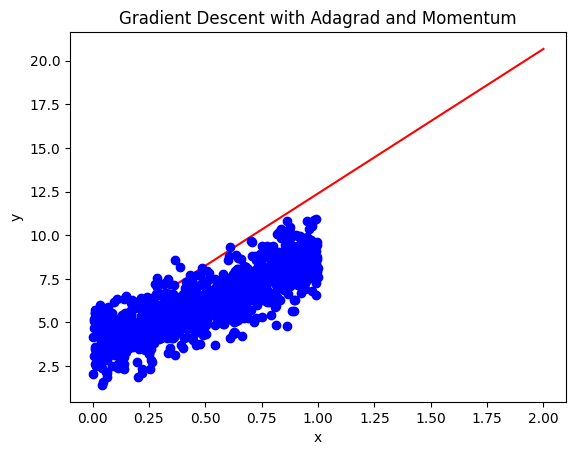

In [44]:
#Gradient Descent with Adagrad and Momentum
import numpy as np
import autograd.numpy as anp
from autograd import grad
import matplotlib.pyplot as plt

def CostOLS(y, X, theta):
    return anp.sum((y - X @ theta)**2)

n = 1000
x = anp.random.rand(n, 1)
y = 4 + 3 * x + 2 * x**2 + anp.random.randn(n, 1)

X = anp.c_[anp.ones((n, 1)), x, x**2]

theta = anp.random.randn(3, 1)
Niterations = 1000

training_gradient = grad(CostOLS, 2)

# Initialize Adagrad accumulator
delta = 1e-8
G = anp.zeros(theta.shape)

# Initialize momentum parameters
momentum = 0.9
velocity = anp.zeros_like(theta)

for _ in range(Niterations):
    gradients = (1.0 / n) * training_gradient(y, X, theta)

    # Accumulate the squared gradients for Adagrad
    G += gradients**2

    # Update with momentum and Adagrad
    velocity = momentum * velocity + (0.03 / (delta + anp.sqrt(G))) * gradients
    theta -= velocity

print("theta from Plain GD with Adagrad and Momentum")
print(theta)

# New data for predictions
x_new = anp.array([[0], [2]])
X_new = anp.c_[anp.ones((2, 1)), x_new, x_new**2]

# Predictions 
y_predict = X_new @ theta

# Plot the results
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y ,'bo')
plt.title('Gradient Descent with Adagrad and Momentum')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [47]:
# Using Autograd to calculate gradients using RMSprop  and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 4 + 3 * x + 2 * x**2 + anp.random.randn(n, 1)

X = anp.c_[anp.ones((n, 1)), x, x**2]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameter rho
rho = 0.99
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Accumulated gradient
	# Scaling with rho the new and the previous results
        Giter = (rho*Giter+(1-rho)*gradients*gradients)
	# Taking the diagonal only and inverting
        update = gradients*eta/(delta+np.sqrt(Giter))
	# Hadamard product
        theta -= update
print("theta from own RMSprop")
print(theta)

Own inversion
[[4.19466764]
 [2.14193563]
 [2.96234138]]
theta from own RMSprop
[[4.1446562 ]
 [2.18306429]
 [3.0195971 ]]


In [48]:

# Using Autograd to calculate gradients using ADAM  and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 4 + 3 * x + 2 * x**2 + anp.random.randn(n, 1)

X = anp.c_[anp.ones((n, 1)), x, x**2]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameters beta1 and beta2, see https://arxiv.org/abs/1412.6980
beta1 = 0.9
beta2 = 0.999
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-7
iter = 0
for epoch in range(n_epochs):
    first_moment = 0.0
    second_moment = 0.0
    iter += 1
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        # Computing moments first
        first_moment = beta1*first_moment + (1-beta1)*gradients
        second_moment = beta2*second_moment+(1-beta2)*gradients*gradients
        first_term = first_moment/(1.0-beta1**iter)
        second_term = second_moment/(1.0-beta2**iter)
	# Scaling with rho the new and the previous results
        update = eta*first_term/(np.sqrt(second_term)+delta)
        theta -= update
print("theta from own ADAM")
print(theta)

Own inversion
[[3.87876641]
 [3.60613094]
 [1.42440378]]
theta from own ADAM
[[3.88217433]
 [3.14182514]
 [2.01088306]]
